In [1]:
import traceback, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d

from itertools import product

In [2]:
def rotation_matrix(d):
    """
    Calculates a rotation matrix given a vector d. The direction of d
    corresponds to the rotation axis. The length of d corresponds to 
    the sin of the angle of rotation.

    Variant of: http://mail.scipy.org/pipermail/numpy-discussion/2009-March/040806.html
    """
    sin_angle = np.linalg.norm(d)

    if sin_angle == 0:
        return np.identity(3)

    d /= sin_angle

    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[0,  d[2],  -d[1]],
                     [-d[2],     0,  d[0]],
                     [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M


def pathpatch_2d_to_3d(pathpatch, z=0, normal='z'):
    """
    Transforms a 2D Patch to a 3D patch using the given normal vector.

    The patch is projected into they XY plane, rotated about the origin
    and finally translated by z.
    """
    if type(normal) is str:  # Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0, 0, 0), index)

    normal /= np.linalg.norm(normal)  # Make sure the vector is normalised

    path = pathpatch.get_path()  # Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path)  # Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D  # Change the class
    pathpatch._code3d = path.codes  # Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor  # Get the face color

    verts = path.vertices  # Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1))  # Obtain the rotation vector
    M = rotation_matrix(d)  # Get the rotation matrix

    pathpatch._segment3d = np.array(
        [np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])


def pathpatch_translate(pathpatch, delta):
    """
    Translates the 3D pathpatch by the amount delta.
    """
    pathpatch._segment3d += delta


In [4]:
def add_plane(ax, pos, normal_axis, size=0.02, color='blue'):
    """Adds a rectangle indicating a plane

    Args:
        ax (Axes): Axes to plot
        pos (float): Where to plot
        normal_axis (string): Axis normal to the plane
        size (float, optional): Dimension of the square. Defaults to 0.02.
        color (str, optional): Fill color. Defaults to 'blue'.
    """

    p = patches.Rectangle((-size, -size), 2 * size, 2 * size, linewidth=8,
                          facecolor=color, alpha=0.2)
    ax.add_patch(p)
    
    # art3d.pathpatch_2d_to_3d(p, z=pos, zdir=normal_axis)
    pathpatch_2d_to_3d(p, z=0, normal=normal_axis)
    pathpatch_translate(p, (pos, 0, 0))

In [5]:
r = np.arange(-0.1, 1.125 * 0.1, 0.2 / 8)
factor = np.pi / r.max()

x, y, z = np.meshgrid(r, 0, 0)
xf = (x + r.max()) / r.max() * np.pi / 2

plot_lim = 0.08

## Bloch walls

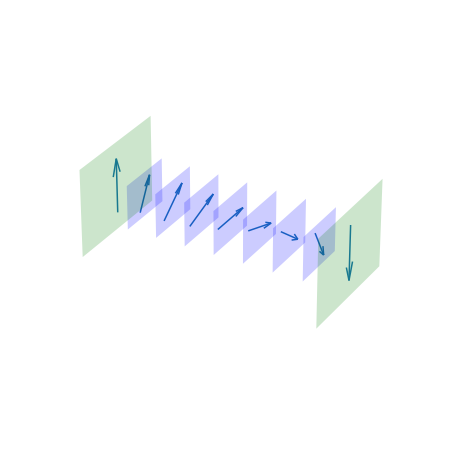

In [8]:
u = np.zeros_like(x)
v = np.sin(xf)
w = np.cos(xf)

scale = np.sqrt(u**2 + v**2 + w**2)

u, v, w = u/scale, v/scale, w/scale

ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.set_xlim(r[0], r[-1])
ax.set_ylim(-plot_lim, plot_lim)
ax.set_zlim(-plot_lim, plot_lim)
ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_ends = np.array([[x[0, 0], x[0, -1]]])
u_ends = np.array([[u[0, 0], u[0, -1]]])
v_ends = np.array([[v[0, 0], v[0, -1]]])
w_ends = np.array([[w[0, 0], w[0, -1]]])
x_mids = np.array([[x[0, 1:-1]]])
u_mids = np.array([[u[0, 1:-1]]])
v_mids = np.array([[v[0, 1:-1]]])
w_mids = np.array([[w[0, 1:-1]]])

ax.quiver(x_ends, 0, 0, u_ends, v_ends, w_ends, pivot='middle', length=0.05)
ax.quiver(x_mids, 0, 0, u_mids, v_mids, w_mids, pivot='middle', length=0.03)

for i in [r[0], r[-1]]:
    add_plane(ax, i, 'x', size=0.04, color='green')

for i in r[1:-1]:
    add_plane(ax, i, 'x')


## Néel walls

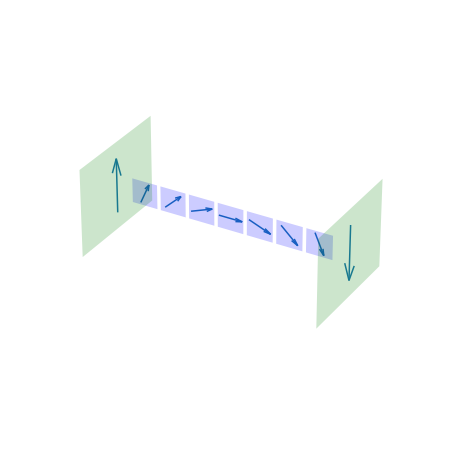

In [10]:
u = np.sin(xf)
v = np.zeros_like(x)
w = np.cos(xf)

scale = np.sqrt(u**2 + v**2 + w**2)

u, v, w = u/scale, v/scale, w/scale

ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.set_xlim(r[0], r[-1])
ax.set_ylim(-plot_lim, plot_lim)
ax.set_zlim(-plot_lim, plot_lim)
ax.set_axis_off()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_ends = np.array([[x[0, 0], x[0, -1]]])
u_ends = np.array([[u[0, 0], u[0, -1]]])
v_ends = np.array([[v[0, 0], v[0, -1]]])
w_ends = np.array([[w[0, 0], w[0, -1]]])
x_mids = np.array([[x[0, 1:-1]]])
u_mids = np.array([[u[0, 1:-1]]])
v_mids = np.array([[v[0, 1:-1]]])
w_mids = np.array([[w[0, 1:-1]]])

ax.quiver(x_ends, 0, 0, u_ends, v_ends, w_ends, pivot='middle', length=0.05);
ax.quiver(x_mids, 0, 0, u_mids, v_mids, w_mids, pivot='middle', length=0.02)

for i in [r[0], r[-1]]:
    add_plane(ax, i, 'x', size=0.04, color='green')

for i in r[1:-1]:
    add_plane(ax, i, 'y', size=0.011)
